In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [2]:
data = pd.read_csv('ion.csv', index_col = 0)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [3]:
data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
V34      0
Class    0
dtype: int64

In [4]:
data.Class.unique()

array(['good', 'bad'], dtype=object)

In [5]:
df = data.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

In [6]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


In [7]:
df.shape

(351, 35)

In [8]:
df_train = df.sample(frac=0.75, random_state=2)
df_valid = df.drop(df_train.index)

In [9]:
max_ = df_train.max(axis=0)
min_ = df_valid.min(axis=0)

scaled_train = (df_train - min_) / (max_ - min_)
scaled_valid = (df_valid - min_) / (max_ - min_)

scaled_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
26,1.0,NaN,1.000000,0.789100,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.00000,0.000000,1.00000,0.00000,1.000000,0.000000,1.0
244,1.0,NaN,0.944265,0.508155,0.960035,0.506525,0.962210,0.506795,0.945895,0.448885,...,0.429310,0.932265,0.440960,0.92768,0.434745,0.91762,0.43774,0.933930,0.438825,0.0
268,1.0,NaN,0.794700,0.195365,0.927150,0.776490,0.905630,0.536425,0.783115,0.581125,...,0.633265,0.745065,0.638435,0.73108,0.642870,0.71742,0.64662,0.704105,0.649710,0.0
267,1.0,NaN,0.883135,0.605530,0.819675,0.690560,0.742045,0.762500,0.575000,0.611365,...,0.483855,0.330290,0.437570,0.36230,0.401430,0.40019,0.37676,0.440530,0.363910,0.0
231,0.0,NaN,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,1.000000,1.000000,0.50000,0.500000,0.50000,0.50000,0.500000,0.500000,1.0


In [10]:
scaled_valid.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
16,1.0,NaN,0.754660,0.03002,1.0,0.633540,0.482400,0.000000,1.000000,0.000000,...,0.961180,0.698760,0.632505,0.50000,0.500000,1.00000,0.615940,0.500000,0.500000,1.0
17,1.0,NaN,0.998225,0.53234,1.0,0.493820,0.989055,0.512490,0.980560,0.511560,...,0.567060,0.897380,0.568190,0.89555,0.576895,0.88561,0.579650,0.854705,0.560075,0.0
20,0.0,NaN,1.000000,0.00000,0.5,0.500000,0.500000,0.500000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,0.000000,1.00000,1.000000,1.000000,1.000000,1.0
23,1.0,NaN,0.980355,0.53544,1.0,0.521480,1.000000,0.546565,0.950845,0.474280,...,0.461475,0.790255,0.488975,0.74832,0.493745,0.75655,0.499925,0.760495,0.499090,0.0
27,1.0,NaN,1.000000,0.45643,1.0,0.413685,0.933175,0.091105,0.974085,0.805265,...,0.085660,0.740680,0.067085,0.70325,0.051630,0.66492,0.039360,0.433295,0.000000,0.0


In [11]:
scaled_train.drop('V2', axis = 1, inplace = True)
scaled_valid.drop('V2', axis = 1, inplace = True)

In [12]:
scaled_train.columns

Index(['V1', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'Class'],
      dtype='object')

In [13]:
X_train = scaled_train.drop('Class', axis = 1)
X_valid = scaled_valid.drop('Class', axis = 1)

y_train = scaled_train.Class
y_valid = scaled_valid.Class

In [14]:
X_train.shape

(263, 33)

## Neural Network

In [15]:
model = keras.Sequential([
    layers.Dense(24, activation = 'relu', input_shape = [33]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation = 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation = 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation = 'sigmoid')
])

In [16]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

In [17]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 20,
    restore_best_weights = True
)

In [18]:
model_data = model.fit(X_train, y_train,
                      validation_data = (X_valid, y_valid),
                      batch_size = 88,
                      epochs = 250,
                      callbacks = [early_stopping],
                      verbose = 0)

In [19]:
df_hist = pd.DataFrame(model_data.history)
df_hist.head()

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.908635,0.490494,0.745383,0.329545
1,0.801460,0.551331,0.727130,0.318182
2,0.826797,0.494297,0.712408,0.397727
3,0.817712,0.532319,0.700922,0.522727
4,0.758809,0.558935,0.691629,0.625000


<AxesSubplot:>

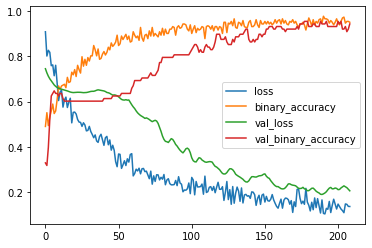

In [20]:
df_hist.plot()

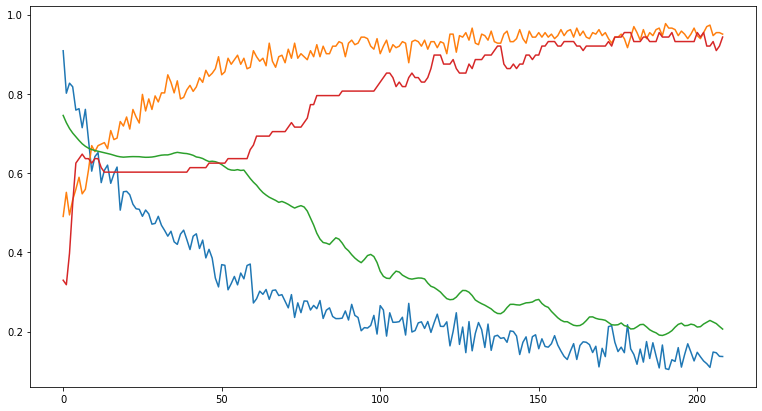

In [21]:
plt.figure(figsize = (13, 7))
plt.plot(df_hist)
plt.show()

In [22]:
print(f"Best Validation Loss: {df_hist.val_loss.min()}")
print(f"Best Validation Accuracy: {df_hist.val_binary_accuracy.max()}")

Best Validation Loss: 0.190124049782753
Best Validation Accuracy: 0.9545454382896423


<AxesSubplot:>

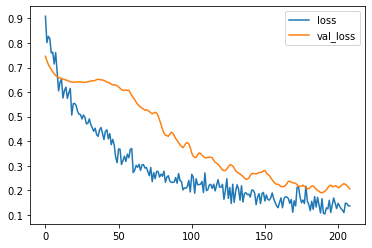

In [23]:
df_hist.loc[:, ['loss', 'val_loss']].plot()

<AxesSubplot:>

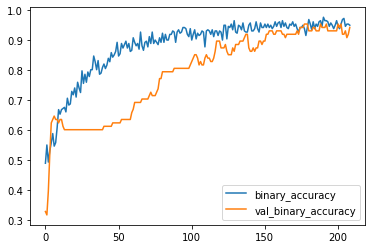

In [24]:
df_hist.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()